## 05. DBSCAN (Density Based Spatial Clustering of Applications with Noise)
- 간단하고 직관적인 밀도 방식의 클러스팅 알고리즘
- 데이터의 분포가 기하학적으로 복잡한 데이터 세트에도 효과적

#### 파라미터
- 입실론 주변 영역(epsilon) : 개별 데이터를 중심으로 입실론 반경을 가지는 원형의 영역
- 최소 데이터 개수(min points) : 개별 데이터의 입실론 주변 영역에 포함되는 타 데이터의 개수

#### 데이터 포인트 정의
- 핵심 포인트(Core Point) : 주변 영역 내에 최소 데이터 개수 이상의 타 데이터를 가지고 있을 경우
- 이웃 포인트(Neighbor Point) : 주변 영역 내에 위치한 타 데이터를 이웃 포인트
- 경계 포인트(Border Point) : 주변 영역 내에 최소 데이터 개수 이상의 이웃 포인트를 가지고 있지 않지만 핵심 포인트를 이웃 포인트로 가지고 있는 데이터
- 잡음 포인트(Noise Point) : 최소 데이터 개수 이상의 이웃 포인트를 가지고 있지 않으며, 핵심 포인트도 이웃 포인트로 가지고 있지 않는 데이터

#### 작동 원리
1. P1~P12 데이터 세트에 대해서 특정 입실론 반경 내에 포함될 최소 데이터 세트를 5개로 가정할 때, P1 데이터를 기준으로 입실론 반경 내에 포함된 데이터는 6개이므로 P1 데이터는 <U>핵심 포인트</U>가 됨.
<img src='https://user-images.githubusercontent.com/38090151/130458734-e5db0042-1140-459b-80d4-d6b715ebcf3d.png' width='50%'>

2. P2 역시 반경 내에 5개의 데이터를 가지고 있으므로 <U>핵심 포인트</U>
<img src='https://user-images.githubusercontent.com/38090151/130458766-6621b54d-fe96-44a2-8ceb-4ca02c44a568.png' width='50%'>

3. 핵심 포인트 P1의 이웃 데이터 포인트 P2 역시 핵심 포인트라면 P1에서 P3로 연결해 직접 접근이 가능하며, 동일한 군집을 형성함
<img src='https://user-images.githubusercontent.com/38090151/130459458-4e4967a0-9ae7-4c38-b23c-2809519be1da.png' width='50%'>

4. P3 데이터의 경우 반경 내 포함되는 이웃이 2개이므로 핵심 포인트가 될 수 없지만 자신이 가진 이웃 포인트 중 핵심 포인트인 P2를 가지고 있기 때문에 <U>경계 포인트</U>가 됨. 경계 포인트는 군집의 외곽을 형성.
<img src='https://user-images.githubusercontent.com/38090151/130459831-71a1f60b-6f2a-4e05-ac34-017677adc95b.png' width='50%'>

5. P5 데이터의 경우 반경 내 최소 데이터를 가지고 있지도 않고, 핵심 포이트를 이웃 포인트로 가지고 있지 않기 때문에 <U>잡음 포인트</U>가 됨.
<img src='https://user-images.githubusercontent.com/38090151/130459860-88947a53-bf99-4959-b45f-b8cad21cf4f2.png' width='50%'>

#### DBSCAN 클래스
- `eps` : 주변 영역의 반경, 일반적으로 1 이하
- `min_samples` : 핵심 포인트가 되기 위해 입실론 주변 영역 내에 포함돼어야 할 데이터의 최소 개수 (자신 포함)



In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
from sklearn.datasets import load_iris

iris = load_iris()
cols = ['sepal_length','sepal_width','petal_length','petal_width']
iris_df = pd.DataFrame(iris.data, columns = cols)
iris_df['target'] = iris.target

iris_df.head(1)

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0


In [9]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.6, min_samples=8, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

iris_df['dbscan_cluster'] = dbscan_labels
iris_df.groupby('target')['dbscan_cluster'].value_counts()

target  dbscan_cluster
0        0                49
        -1                 1
1        1                46
        -1                 4
2        1                42
        -1                 8
Name: dbscan_cluster, dtype: int64

- 레이블 중 '-1'은 노이즈에 속하는 군집
- target 값의 종류는 3가지인데, 군집이 2개가 됐다고 군집화 효율이 떨어지는 것은 아님
- DBSCAN은 알고리즘에 따라 군집의 개수를 자동으로 지정
- 붓꽃 데이터 세트는 3개로 하는 것보다 2개로 하는 것이 군집화의 효율에서는 더 좋음

#### DBSCAN 시각화

In [13]:
### 클러스터 결과를 담은 DataFrame과 사이킷런의 Cluster 객체등을 인자로 받아 클러스터링 결과를 시각화하는 함수  
def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    if iscenter :
        centers = clusterobj.cluster_centers_
        
    unique_labels = np.unique(dataframe[label_name].values)
    markers=['o', 's', '^', 'x', '*']
    isNoise=False

    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name]==label]
        if label == -1:
            cluster_legend = 'Noise'
            isNoise=True
        else :
            cluster_legend = 'Cluster '+str(label)
        
        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], s=70,\
                    edgecolor='k', marker=markers[label], label=cluster_legend)
        
        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        alpha=0.9, edgecolor='k', marker=markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\
                        edgecolor='k', marker='$%d$' % label)
    if isNoise:
        legend_loc='upper center'
    else: legend_loc='upper right'
    
    plt.legend(loc=legend_loc)
    plt.show()

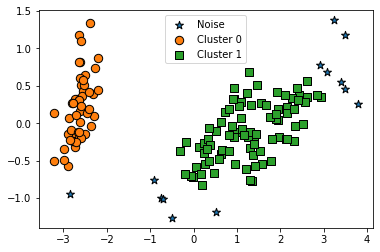

In [14]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=0)
iris_pca = pca.fit_transform(iris.data)

iris_pca_df = pd.DataFrame(iris_pca, columns=['ftr1', 'ftr2'])
iris_pca_df['target'] = iris.target

iris_pca_df['dbscan_label'] = dbscan.labels_
# iris_pca_df.head()

visualize_cluster_plot(dbscan, iris_pca_df, 'dbscan_label', iscenter=False)

- 이상치인 노이즈 데이터가 명확하게 드러남
- DBSCAN을 적용할 때는 특정 군집 개수를 강제하지 않고, 적절한 eps와 min_samples 파라미터를 통해 최적의 군집을 찾는 것이 중요
- min_samples를 크게 하면 주어진 반경 내에 더 많은 데이터를 포함시켜야 하므로 노이즈 데이터 개수가 커짐, 데이터 밀도가 더 커져야 하는데 매우 촘촘한 데이터 분포가 아닌 경우 노이즈로 인식
- eps을 증가시키면 노이즈 데이터 개수가 작아짐

target  dbscan_cluster
0        0                48
        -1                 2
1        1                44
        -1                 6
2        1                36
        -1                14
Name: dbscan_cluster, dtype: int64


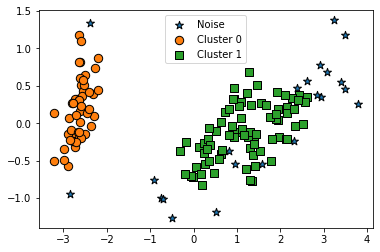

In [19]:
# min_sample 증가
dbscan = DBSCAN(eps=0.6, min_samples=16, metric='euclidean')
iris_pca_df['dbscan_cluster'] = dbscan.fit_predict(iris.data)

print(iris_pca_df.groupby('target')['dbscan_cluster'].value_counts())

visualize_cluster_plot(dbscan, iris_pca_df, 'dbscan_cluster', iscenter=False)

- 노이즈 포인트 증가

target  dbscan_cluster
0        0                50
1        1                50
2        1                47
        -1                 3
Name: dbscan_cluster, dtype: int64


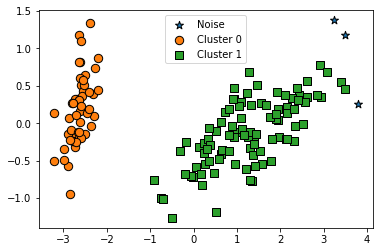

In [18]:
# eps 증가

dbscan = DBSCAN(eps=0.8, min_samples=8, metric='euclidean')
iris_pca_df['dbscan_cluster'] = dbscan.fit_predict(iris.data)

print(iris_pca_df.groupby('target')['dbscan_cluster'].value_counts())

visualize_cluster_plot(dbscan, iris_pca_df, 'dbscan_cluster', iscenter=False)

- 노이즈 포인트 감소

### DBSCAN 적용하기 - make_circles() 데이터 세트
make_circles() 함수를 이용해 내부 원과 외부 원 형태로 되어 있는 2차원 데이터 세트를 만듦, 내부 원과 외부 원을 서로 다른 클래스로 구분
- `noise` : 노이즈 데이터 세트의 비율
- `factor` : 외부 원과 내부 원의 scale 비율

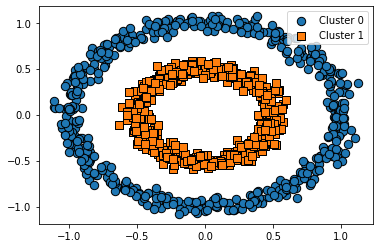

In [23]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=1000, shuffle=True, noise=0.05, random_state=0, factor=0.5)

cluster_df = pd.DataFrame(data=X, columns=['ftr1','ftr2'])
cluster_df['target'] = y

visualize_cluster_plot(None, cluster_df, 'target', iscenter=False)

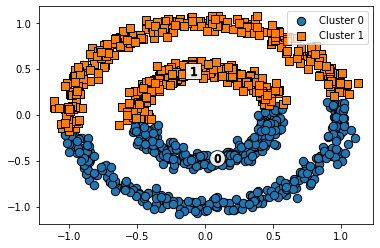

In [25]:
# KMeans
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, random_state=0)
cluster_df['kmeans_label'] = kmeans.fit_predict(X)

visualize_cluster_plot(kmeans, cluster_df, 'kmeans_label', iscenter=True)

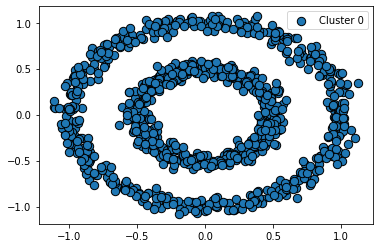

In [30]:
# MeanShift
from sklearn.cluster import MeanShift
from sklearn.cluster import estimate_bandwidth

best_h = estimate_bandwidth(X)
meanshift = MeanShift(bandwidth=best_h)
cluster_df['meanshift_label'] = meanshift.fit_predict(X)

visualize_cluster_plot(meanshift, cluster_df, 'meanshift_label', iscenter=False)

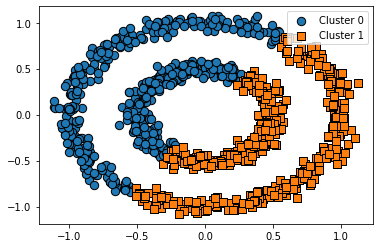

In [27]:
# GMM
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=2, random_state=0)
cluster_df['gmm_label'] = gmm.fit_predict(X)

visualize_cluster_plot(gmm, cluster_df, 'gmm_label', iscenter=False)

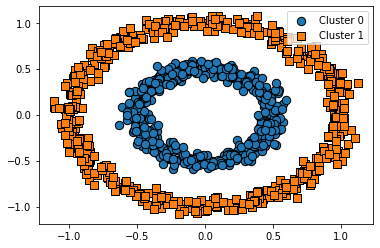

In [38]:
# DBSCAN
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.2, min_samples=10)
cluster_df['dbscan_label'] = dbscan.fit_predict(X)

visualize_cluster_plot(dbscan, cluster_df, 'dbscan_label', iscenter=False)

#### DBSCAN 장점
- 군집 개수를 지정할 필요 X = MeanShift
- 노이즈 포인트를 이용해 이상치 처리가 가능함
- 밀도에 따라서 군집화하기 때문에 기하학적인 모양을 갖는 군집도 잘 찾을 수 있음
<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/0/05/DBSCAN-density-data.svg/1920px-DBSCAN-density-data.svg.png' width='30%'>

#### 참조
- 클러스터링 #3 - DBSCAN (밀도 기반 클러스터링) [링크](https://bcho.tistory.com/1205)
- DBSCAN wiki [link](https://en.wikipedia.org/wiki/DBSCAN)